# 2. Intermediate

We have covered a number of features within Pandas, such as the basics of **Series** and **DataFrame**, reading files, checking for missing data, querying/selection, aggregation, sorting/ranking and handling strings.

In this section we're going to cover types of different data, reshaping dataframes and method chaining.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

### Categorical Types

In [2]:
c = pd.Categorical(['a', 'b', 'b', 'c', 'a', 'b', 'a', 'a', 'a', 'c'])
c

[a, b, b, c, a, b, a, a, a, c]
Categories (3, object): [a, b, c]

In [3]:
c.describe()

,counts,freqs
categories,,
a,5,0.5
b,3,0.3
c,2,0.2


In [4]:
c.codes

array([0, 1, 1, 2, 0, 1, 0, 0, 0, 2], dtype=int8)

In [5]:
# you can provide information as to the ordering of the categories
c.as_ordered()

[a, b, b, c, a, b, a, a, a, c]
Categories (3, object): [a < b < c]

In [6]:
c.dtype

CategoricalDtype(categories=['a', 'b', 'c'], ordered=False)

### DateTime Types

In [7]:
dates = pd.date_range("1/1/2016", periods=70, freq="D")
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16',
               '2016-01-17', '2016-01-18', '2016-01-19', '2016-01-20',
               '2016-01-21', '2016-01-22', '2016-01-23', '2016-01-24',
               '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
               '2016-01-29', '2016-01-30', '2016-01-31', '2016-02-01',
               '2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05',
               '2016-02-06', '2016-02-07', '2016-02-08', '2016-02-09',
               '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-13',
               '2016-02-14', '2016-02-15', '2016-02-16', '2016-02-17',
               '2016-02-18', '2016-02-19', '2016-02-20', '2016-02-21',
               '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25',
      

In [8]:
y = pd.Series(np.random.randn(70), index=dates)
y.head()

2016-01-01   -0.479171
2016-01-02   -0.704272
2016-01-03   -1.784885
2016-01-04    1.170635
2016-01-05   -0.361389
Freq: D, dtype: float64

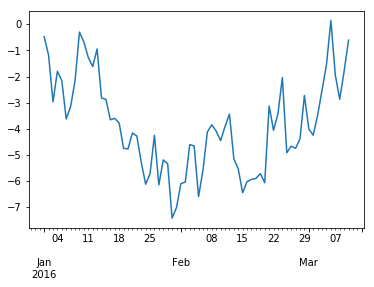

In [9]:
y.cumsum().plot()

When a datetime type is in a DataFrame, there is a special accessor to access the information inside it:

In [10]:
y.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
             4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
             9, 10],
           dtype='int64')

In [11]:
y.index.week

Int64Index([53, 53, 53,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
             3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
             5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
             7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10,
            10, 10],
           dtype='int64')

In [12]:
y.loc["2016-01-01":"2016-01-05"]

2016-01-01   -0.479171
2016-01-02   -0.704272
2016-01-03   -1.784885
2016-01-04    1.170635
2016-01-05   -0.361389
Freq: D, dtype: float64

Our timeseries is in days, we can easily resample to weeks, months, years etc, depending on the versatility of our data, and interpolate.

In [13]:
y.resample("W").mean()

2016-01-03   -0.989443
2016-01-10    0.327672
2016-01-17   -0.418367
2016-01-24   -0.359916
2016-01-31   -0.127814
2016-02-07    0.413705
2016-02-14   -0.202827
2016-02-21    0.345049
2016-02-28   -0.179138
2016-03-06    0.646667
2016-03-13   -0.188876
Freq: W-SUN, dtype: float64

Or going to higher frequencies, we can fill in the missing values optionally:

In [14]:
y.asfreq("H", method='ffill').head()

2016-01-01 00:00:00   -0.479171
2016-01-01 01:00:00   -0.479171
2016-01-01 02:00:00   -0.479171
2016-01-01 03:00:00   -0.479171
2016-01-01 04:00:00   -0.479171
Freq: H, dtype: float64

Lagging/rolling timeseries is trivial:

In [15]:
y.shift(1).head()

2016-01-01         NaN
2016-01-02   -0.479171
2016-01-03   -0.704272
2016-01-04   -1.784885
2016-01-05    1.170635
Freq: D, dtype: float64

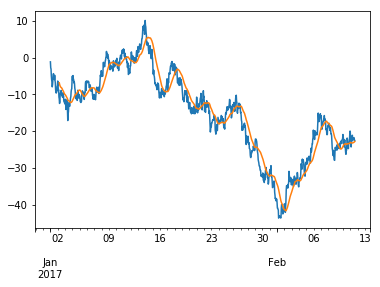

In [16]:
y_cum = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2017", periods=1000, freq="H")).cumsum()
y_cum.plot()
roll = y_cum.rolling(window=30).mean().plot()

### Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data; particularly for machine learning where algorithms for prediction rely on strict criteria for $X$ and $y$ inputs.

To illustrate this, we will work with a dataset from "*Statistical Methods for the Analysis of Repeated Measurements by Charles S. Davis, pp. 161-163 (Springer, 2002)*", which handles some data from a controlled trial of botulinum toxin type B (BoTB) in patients with cervical dystonia.
* Response variable: (twstrs), measuring severity, pain, and disability caused from cervical dystonia.
* Measured multiple times per patient in weeks 0, 2, 4, 8, 12 and 16.

In [17]:
cdystonia = pd.read_csv("cdystonia.csv")
cdystonia.head(10)

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
5,1,6,16,1,1,5000U,65,F,36
6,2,1,0,1,2,10000U,70,F,60
7,2,2,2,1,2,10000U,70,F,26
8,2,3,4,1,2,10000U,70,F,27
9,2,4,8,1,2,10000U,70,F,41


We could use the *stack()* method to rotate the dataframe, so that columns are represented as rows:

In [18]:
cdystonia.stack().head(20)

0  patient        1
   obs            1
   week           0
   site           1
   id             1
   treat      5000U
   age           65
   sex            F
   twstrs        32
1  patient        1
   obs            2
   week           2
   site           1
   id             1
   treat      5000U
   age           65
   sex            F
   twstrs        30
2  patient        1
   obs            3
dtype: object

We could create a **hierarchical index** with this to make the data more understandable:

In [19]:
cdystonia2 = cdystonia.set_index(['patient','obs']).drop("id",axis=1)
cdystonia2.head(10)

week  site   treat  age sex  twstrs
patient obs                                     
1       1       0     1   5000U   65   F      32
        2       2     1   5000U   65   F      30
        3       4     1   5000U   65   F      24
        4       8     1   5000U   65   F      37
        5      12     1   5000U   65   F      39
        6      16     1   5000U   65   F      36
2       1       0     1  10000U   70   F      60
        2       2     1  10000U   70   F      26
        3       4     1  10000U   70   F      27
        4       8     1  10000U   70   F      41

We could disregard most of the table, and unstack the response variable in columns to make it 'per patient':

In [20]:
twstrs_wide = cdystonia2.twstrs.unstack("obs")
twstrs_wide.head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


Now we could re-merge this back into the original dataset with observation and twstrs as column-data, making a wide-format:

In [21]:
cdystonia_wide = (cdystonia[['patient','site','treat','age','sex']]
     .drop_duplicates()
     .merge(twstrs_wide, right_index=True, left_on="patient", how='inner'))
cdystonia_wide.head()

,patient,site,treat,age,sex,1,2,3,4,5,6
0,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


We can revert back to long-form using `melt()`.

In [22]:
pd.melt(cdystonia_wide, id_vars=["patient","site","treat","age","sex"], var_name="obs", value_name="twstrs").head()

,patient,site,treat,age,sex,obs,twstrs
0,1,1,5000U,65,F,1,32.0
1,2,1,10000U,70,F,1,60.0
2,3,1,5000U,64,F,1,44.0
3,4,1,Placebo,59,F,1,53.0
4,5,1,10000U,76,F,1,53.0


Alternatively we can use pivots:

In [23]:
cdystonia.pivot(index="patient", columns="week", values="twstrs").head()

week,0,2,4,8,12,16
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


This can include hierarchical indexing/columns:

In [24]:
cdystonia.pivot_table(index=["patient","id"], columns=["week","obs"], values="twstrs").head()

,week,0,2,4,8,12,16
,obs,1,2,3,4,5,6
patient,id,,,,,,
1,1,32.0,30.0,24.0,37.0,39.0,36.0
2,2,60.0,26.0,27.0,41.0,65.0,67.0
3,3,44.0,20.0,23.0,26.0,35.0,35.0
4,4,53.0,61.0,64.0,62.0,NaN,NaN
5,5,53.0,35.0,48.0,49.0,41.0,51.0


### Method Chaining

You notice in one of the above examples of merging the wide-format into the whole dataset, we used function chaining to get what we wanted.

Let's say we wanted to perform a series of different operations on this data to obtain a more useful column/metric and output:

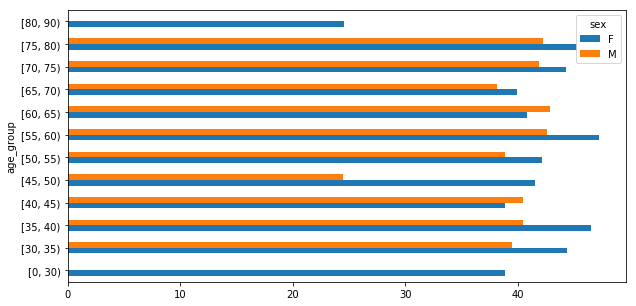

In [25]:
(cdystonia.assign(age_group=pd.cut(cdystonia.age, [0, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90], right=False))
    .groupby(['age_group','sex']).mean()
    .twstrs.unstack("sex")
    .fillna(0.0)
    .plot.barh(figsize=(10,5)))

### Pipes

One of the problems with method chaining is that it requires all of the functionality you need for data processing to be implemented somewhere as methods which return the actual DataFrame object in order to chain. Occasionally we want to do custom manipulations to our data, this is solved in *pipe*.

For example, we may wish to calculate the *proportion of twstrs* in the whole dataset to see differences between each patient in proportional terms across time to all of the other patients in their age group, their state of pain etc.

In [26]:
def to_proportions(df, axis=1):
    row_totals = df.sum(axis)
    return df.div(row_totals, True - axis)

(cdystonia.assign(age_group=pd.cut(cdystonia.age, [0, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90], right=False))
    .groupby(["week","age_group"]).mean()
    .twstrs.unstack("age_group")
    .pipe(to_proportions, axis=1))

age_group,"[0, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 70)","[70, 75)","[75, 80)","[80, 90)"
week,,,,,,,,,,,,
0,0.077768,0.086100,0.090993,0.082132,0.078693,0.089248,0.087231,0.086857,0.077027,0.086563,0.090729,0.066658
2,0.109625,0.074226,0.104079,0.086025,0.081267,0.083198,0.091862,0.085873,0.080638,0.083075,0.085873,0.034258
4,0.062810,0.074888,0.102670,0.085481,0.088175,0.088900,0.096772,0.090262,0.085196,0.091497,0.094698,0.038652
8,0.080700,0.092696,0.089113,0.083385,0.082088,0.084907,0.095968,0.087442,0.082102,0.087244,0.097277,0.037079
12,0.074513,0.097672,0.085733,0.083962,0.076862,0.089694,0.091690,0.085497,0.084294,0.095155,0.090623,0.044305
16,0.078422,0.092100,0.086238,0.074634,0.075534,0.080489,0.092476,0.080743,0.080526,0.095064,0.089000,0.074774


We can now see the proportion of response variable across the age groups, per week.

### Data Transformation

We have several options for *transforming* labels and other columns into more useful features:

In [27]:
cdystonia.treat.replace({'Placebo': 0, "5000U": 1, "10000U": 2}).head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    2
7    2
8    2
9    2
Name: treat, dtype: int64

In [28]:
cdystonia.treat.astype("category").head(10)

0     5000U
1     5000U
2     5000U
3     5000U
4     5000U
5     5000U
6    10000U
7    10000U
8    10000U
9    10000U
Name: treat, dtype: category
Categories (3, object): [10000U, 5000U, Placebo]

In [29]:
pd.cut(cdystonia.age, [20,40,60,80], labels=["Young","Middle-Aged","Old"])[-25:]

606            Old
607            Old
608            Old
609            Old
610    Middle-Aged
611    Middle-Aged
612    Middle-Aged
613    Middle-Aged
614    Middle-Aged
615    Middle-Aged
616    Middle-Aged
617    Middle-Aged
618    Middle-Aged
619    Middle-Aged
620          Young
621          Young
622          Young
623          Young
624          Young
625          Young
626    Middle-Aged
627    Middle-Aged
628    Middle-Aged
629    Middle-Aged
630    Middle-Aged
Name: age, dtype: category
Categories (3, object): [Young < Middle-Aged < Old]

We can use qcut to automatically divide our data into even-sized $q$-tiles. For example $q=4$ refers to quartiles.

In [30]:
pd.qcut(cdystonia.age, 4)[-10:]

621    (25.999, 46.0]
622    (25.999, 46.0]
623    (25.999, 46.0]
624    (25.999, 46.0]
625    (25.999, 46.0]
626      (56.0, 65.0]
627      (56.0, 65.0]
628      (56.0, 65.0]
629      (56.0, 65.0]
630      (56.0, 65.0]
Name: age, dtype: category
Categories (4, interval[float64]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

## Sparse Dataframes

**WRITE SOMETHING HERE**

## Pandas Panels

## Tasks

### Task 1

**HANDLING CATEGORICAL VARIABLES Q**

### Task 2

**DATETIME SERIES Q**

### Task 3

**RESHAPING A DATASET WITH PIVOT, PIVOT_TABLE, MERGE, OR GROUPBY**

### Task 4

**WRITING A CUSTOM PIPE**

### Task 5

In [31]:
pd.crosstab?

Signature: pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
Docstring:
Compute a simple cross-tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
aggfunc : function, optional
    If specified, requires `values` be specified as well
rownames : sequence, default None
    If passed, must match number of row arrays passed
colnames : sequence, default None
    If passed, must match number of column arrays passed
margins : boolean, default False
    Add row/column mar